# Assignment 1

__*m12001643 Ilyes Justin <br>
m11804717 Seidl Stefan <br>
m01605389 Wagermaier Daniel*__ <br>

## 1) Import Librarys

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
import sklearn.model_selection as skms
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

## 2) Import data and create test, training and validation set

In [2]:
file_name = 'alldigits.csv'
df = pd.read_csv(file_name)
data = df.to_numpy()

X = data[:, :-1]
y = data[:, -1]

test_size = 0.1
validation_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size/(1-test_size), random_state=0)

total_points_testSet = len(y_test)
total_points_valSet = len(y_val)

## 3) Plotting the Images

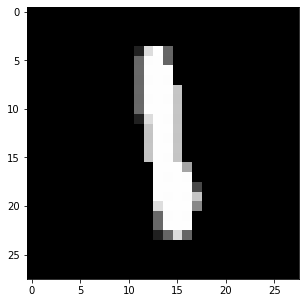

In [3]:
pictures = []
picture_size = 28
for row in data:
    single_picture_matrix = []
    for i in range(picture_size):
        inner_list = []
        for j in range(picture_size):
            inner_list.append(int(row[j * picture_size + i]))
        single_picture_matrix.append(inner_list)
    pictures.append(single_picture_matrix)

plt.rcParams['figure.figsize'] = [10, 5] #change inline figure size [width, higth]
n = 200    
plt.imshow(pictures[n], cmap='Greys_r', vmin=0, vmax=255)
plt.show() 

# 4) Analyse the Data

Points in Trainset: 4200
Points in Testset: 600
Points in Validationset: 1200
Test/Train Ratio: 0.14285714285714285
Validation/Train Ratio: 0.2857142857142857


Text(0.5, 0, 'Numbers')

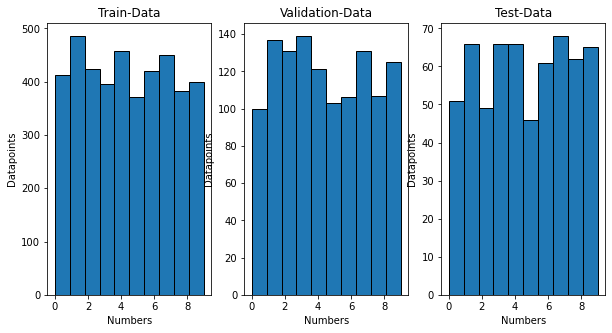

In [4]:
print("Points in Trainset: " + str(len(y_train)))
print("Points in Testset: " + str(len(y_test)))
print("Points in Validationset: " + str(len(y_val)))
print("Test/Train Ratio: " + str(len(y_test)/len(y_train)))
print("Validation/Train Ratio: " + str(len(y_val)/len(y_train)))

plt.figure(1)
plt.align = "mid"

plt.subplot(1, 3, 1)
nr_bins = len(set(y_train))
plt.hist(y_train,edgecolor="black",bins=nr_bins)
plt.title("Train-Data")
plt.xlabel("Numbers")
plt.ylabel("Datapoints")

plt.subplot(1, 3, 2)
plt.hist(y_val,nr_bins,edgecolor="black")
plt.title("Validation-Data")
plt.xlabel("Numbers")
plt.ylabel("Datapoints")

plt.subplot(1, 3, 3)
plt.hist(y_test,nr_bins,edgecolor="black")
plt.title("Test-Data")
plt.ylabel("Datapoints")
plt.xlabel("Numbers")

# 5) Decision Tree

Prior to implementing the Decision Tree Classifier, we went through the sklearn documentation and ultimately decided to use the standard implementation with "Gini Index" as the default criteria. 

The accuracy of the classifiers was calculated according to the following formula:
$$ Accuracy = \frac{Number Correct Labeled Points}{Number All PointsValidation Set} $$



In [5]:
dtc = tree.DecisionTreeClassifier() # creates the decision tree classifier (default = "gini")
dtc.fit(X_train, y_train) # trains the model
predicted = dtc.predict(X_val) # classifies/predicts incoming test data

dtc_correct_labeled = (y_val == predicted).sum()
print("Correct labeled(Decision Tree): " + str(dtc_correct_labeled) + " from " + \
      str(total_points_valSet) + " (Accuracy: " + str(round((dtc_correct_labeled/total_points_valSet)*100,2)) +"%)")



Correct labeled(Decision Tree): 876 from 1200 (Accuracy: 73.0%)


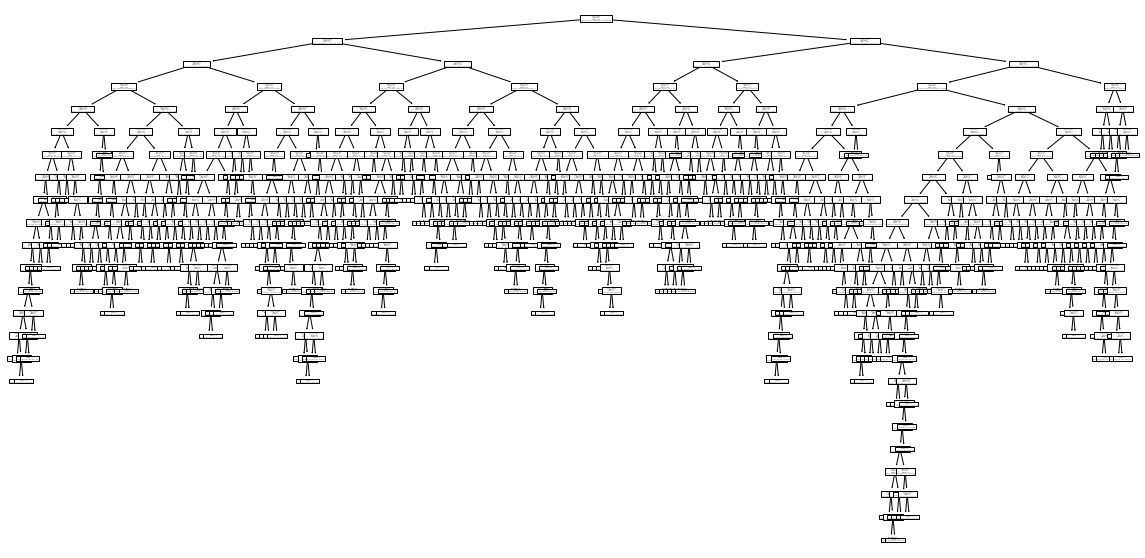

In [6]:
plt.rcParams['figure.figsize'] = [20, 10] #change inline figure size [width, higth]
tree.plot_tree(dtc)
plt.show() # visualizes the decision tree

# 6) Naive Bayes

After reviewing the documentation of the sklearn kit, we went on to implement the multiple Naive Bayes Classifiers into our code. The following methods were used: GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB() and CategoricalNB(). For each of the classifiers, the default parameters were used in the implementations. 

The accuracy of the classifiers was calculated according to the following formula:
$$ Accuracy = \frac{Number Correct Labeled Points}{Number All PointsValidation Set} $$

## 6.1) Gaussian 


In [7]:
gNB = GaussianNB()
y_pred_gauss = gNB.fit(X_train, y_train).predict(X_val)
gauss_correct_labeled = (y_val == y_pred_gauss).sum()
print("Correct labeled(Gauss): " + str(gauss_correct_labeled) + " from " + \
      str(total_points_valSet) + " (Accuracy: " + str(round((gauss_correct_labeled/total_points_valSet)*100,2)) +"%)")

Correct labeled(Gauss): 682 from 1200 (Accuracy: 56.83%)


## 6.2) Multinominal

In [8]:
mNB = MultinomialNB()
y_pred_multi = mNB.fit(X_train, y_train).predict(X_val)
multi_correct_labeled = (y_val == y_pred_multi).sum()
print("Correct labeled(Multinominal): " + str(multi_correct_labeled) + " from " + \
      str(total_points_valSet) + " (Accuracy: " + str(round((multi_correct_labeled/total_points_valSet)*100,2)) +"%)")

Correct labeled(Multinominal): 999 from 1200 (Accuracy: 83.25%)


## 6.3) Complement

In [9]:
cNB = ComplementNB()
y_pred_comp = cNB.fit(X_train, y_train).predict(X_val)
comp_correct_labeled = (y_val == y_pred_comp).sum()
print("Correct labeled(Complement): " + str(comp_correct_labeled) + " from " + \
      str(total_points_valSet) + " (Accuracy: " + str(round((comp_correct_labeled/total_points_valSet)*100,2)) +"%)")

Correct labeled(Complement): 865 from 1200 (Accuracy: 72.08%)


## 6.4) Bernoulli

In [10]:
bNB = BernoulliNB()
y_pred_bNB = bNB.fit(X_train, y_train).predict(X_val)
ber_correct_labeled = (y_val == y_pred_bNB).sum()
print("Correct labeled(Bernoulli): " + str(ber_correct_labeled) + " from " + \
      str(total_points_valSet) + " (Accuracy: " + str(round((ber_correct_labeled/total_points_valSet)*100,2)) +"%)")

Correct labeled(Bernoulli): 995 from 1200 (Accuracy: 82.92%)


## 6.5) Categorical

In [11]:
catNB = CategoricalNB(min_categories=256)
y_pred_cat = catNB.fit(X_train, y_train).predict(X_val)
cat_correct_labeled = (y_val == y_pred_cat).sum()
print("Correct labeled(Categorical): " + str(cat_correct_labeled) + " from " + \
      str(total_points_valSet) + " (Accuracy: " + str(round((cat_correct_labeled/total_points_valSet)*100, 2)) +"%)")

Correct labeled(Categorical): 755 from 1200 (Accuracy: 62.92%)


## 7) Error estimation and comparison

To calculate the upper error boundary a confidence of 95% was chosen.

In [12]:
confidence = 0.95
c_significance = stats.norm.ppf((1 + confidence) / 2)

y_pred = catNB.predict(X_test)
catNB_emp_error = (len(y_test) - (y_test == y_pred).sum()) / len(y_test)
catNB_upper_error = catNB_emp_error + c_significance * np.sqrt(catNB_emp_error * (1 - catNB_emp_error) / len(y_test)) + c_significance / len(y_test)
print("CategoricalNB upper error: " + str(round(catNB_upper_error * 100, 2)) + "%")

y_pred = bNB.predict(X_test)
bNB_emp_error = (len(y_test) - (y_test == y_pred).sum()) / len(y_test)
bNB_upper_error = bNB_emp_error + c_significance * np.sqrt(bNB_emp_error * (1 - bNB_emp_error) / len(y_test)) + c_significance / len(y_test)
print("BernoulliNB upper error: " + str(round(bNB_upper_error * 100, 2)) + "%")

y_pred = cNB.predict(X_test)
cNB_emp_error = (len(y_test) - (y_test == y_pred).sum()) / len(y_test)
cNB_upper_error = cNB_emp_error + c_significance * np.sqrt(cNB_emp_error * (1 - cNB_emp_error) / len(y_test)) + c_significance / len(y_test)
print("ComplementNB upper error: " + str(round(cNB_upper_error * 100, 2)) + "%")

y_pred = mNB.predict(X_test)
mNB_emp_error = (len(y_test) - (y_test == y_pred).sum()) / len(y_test)
mNB_upper_error = mNB_emp_error + c_significance * np.sqrt(mNB_emp_error * (1 - mNB_emp_error) / len(y_test)) + c_significance / len(y_test)
print("MultinomialNB upper error: " + str(round(mNB_upper_error * 100, 2)) + "%")

y_pred = gNB.predict(X_test)
gNB_emp_error = (len(y_test) - (y_test == y_pred).sum()) / len(y_test)
gNB_upper_error = gNB_emp_error + c_significance * np.sqrt(gNB_emp_error * (1 - gNB_emp_error) / len(y_test)) + c_significance / len(y_test)
print("GaussianNB upper error: " + str(round(gNB_upper_error * 100, 2)) + "%")

y_pred = dtc.predict(X_test)
dtc_emp_error = (len(y_test) - (y_test == y_pred).sum()) / len(y_test)
dtc_upper_error = dtc_emp_error + c_significance * np.sqrt(dtc_emp_error * (1 - dtc_emp_error) / len(y_test)) + c_significance / len(y_test)
print("DecisionTreeClassifier upper error: " + str(round(dtc_upper_error * 100, 2)) + "%")


CategoricalNB upper error: 42.89%
BernoulliNB upper error: 18.54%
ComplementNB upper error: 33.99%
MultinomialNB upper error: 20.15%
GaussianNB upper error: 47.79%
DecisionTreeClassifier upper error: 26.87%


According to the calculated upper error bounds, we came to the conclusion that the BernoulliNB returns the highest accuracy with an upper error of at most 18.54% (confidence 95%)